<a href="https://colab.research.google.com/github/caropeboka/diabetes-classifier/blob/main/MSIB_Deep_Learning_dengan_Keras_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Kevin Mahendra Caropeboka

MSIB Bisa AI

AI-Hacker

Deep Learning dengan Keras Python

In [ ]:
#mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
sns.set_palette("bright")
from matplotlib import style
style.use("ggplot")
import os

In [ ]:
#read csv
df = pd.read_csv(r"drive/MyDrive/Dataset/diabetes.csv")

In [ ]:
#check data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


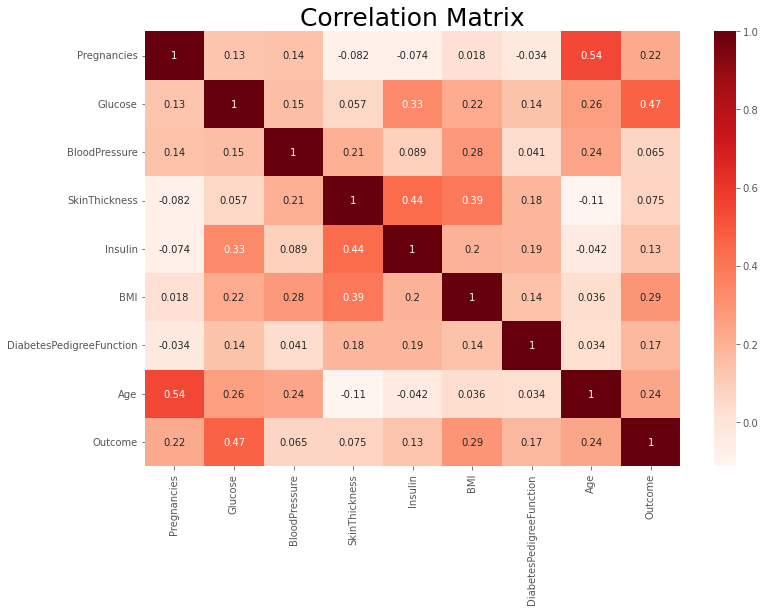

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.title("Correlation Matrix", fontsize = 25);

In [ ]:
pd.DataFrame(df.corr()["Outcome"].sort_values(ascending = False)[1:])

,Outcome
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#comparing ml models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

model_log = LogisticRegression()
model_svc = SVC()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_gbm = GradientBoostingClassifier()

model_list = [model_log, model_svc, model_knn, model_rf, model_gbm]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for model in model_list:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(model)
    print(accuracy_score(pred,y_test))
    print("------------------------------")

LogisticRegression()
0.8246753246753247
------------------------------
SVC()
0.7922077922077922
------------------------------
KNeighborsClassifier()
0.7532467532467533
------------------------------
RandomForestClassifier()
0.8116883116883117
------------------------------
GradientBoostingClassifier()
0.8116883116883117
------------------------------


In [ ]:
#model tuning
from sklearn.model_selection import GridSearchCV
params = {
    'loss'          : ['deviance', 'exponential'],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'n_estimators'  : [50, 100, 200],
    'subsample'     : [0.1, 0.2, 0.5, 1.0],
    'max_depth'     : [2, 3, 4, 5]
}
gbm = GradientBoostingClassifier()
cv_model = GridSearchCV(gbm, params, cv = 10, n_jobs = -1)

In [ ]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 loss = "deviance", 
                                 max_depth = 3, 
                                 n_estimators = 200, 
                                 subsample = 0.1, 
                                 random_state = 46)

gbm.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=46, subsample=0.1)

In [ ]:
pred = gbm.predict(x_test)
accuracy_score(pred, y_test)

0.8181818181818182

In [ ]:
#model feature importances
df_importances = pd.DataFrame(gbm.feature_names_in_, gbm.feature_importances_)
df_importances.columns = ["Feature_Names"]
df_importances["Importances"] = df_importances.index
df_importances = df_importances.sort_values(by = "Importances", ascending = True)
df_importances.index = np.arange(0,len(df_importances))

In [ ]:
df_importances

,Feature_Names,Importances
0,Insulin,0.056227
1,SkinThickness,0.056959
2,Pregnancies,0.066091
3,BloodPressure,0.082933
4,DiabetesPedigreeFunction,0.135167
5,Age,0.152771
6,BMI,0.170455
7,Glucose,0.279398


In [ ]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


In [ ]:
# pip install matplotlib --upgrade

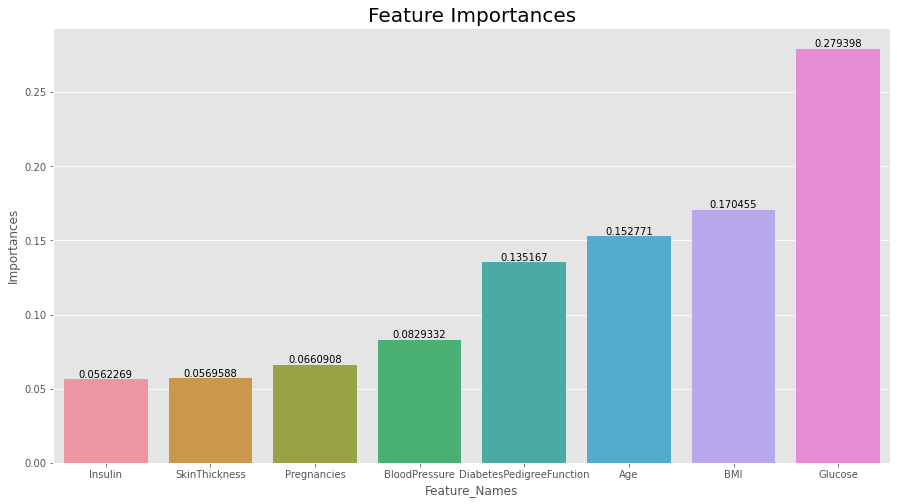

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Feature_Names", y = "Importances", data = df_importances)
plt.title("Feature Importances", fontsize = 20)
for bars in ax.containers:
  ax.bar_label(bars)

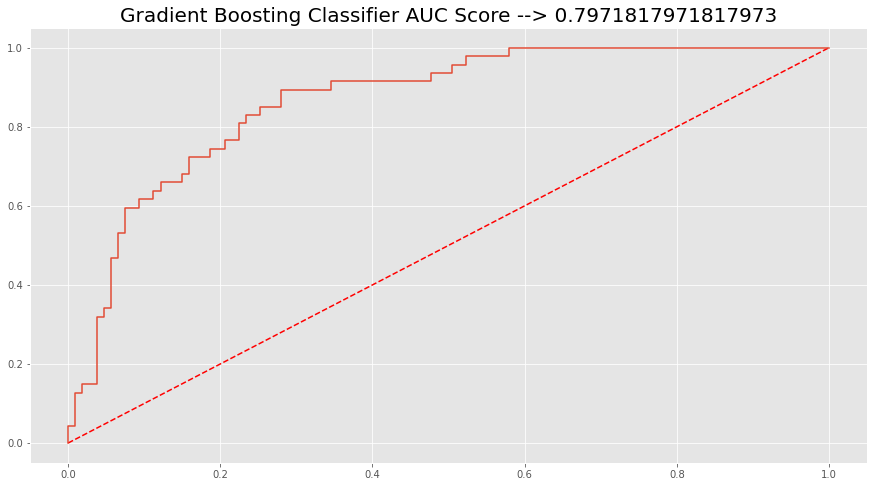

In [ ]:
#roc curve
from sklearn.metrics import roc_curve, roc_auc_score
prob = gbm.predict_proba(x_test)[:,1]
fp, tp, e = roc_curve(y_test, prob)

plt.figure(figsize = (15,8))
plt.plot([0,1], [0,1], "r--")
plt.plot(fp, tp)
plt.title("Gradient Boosting Classifier AUC Score --> "+str(roc_auc_score(pred, y_test)), fontsize = 20);

In [ ]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       117
           1       0.60      0.76      0.67        37

    accuracy                           0.82       154
   macro avg       0.76      0.80      0.77       154
weighted avg       0.84      0.82      0.82       154



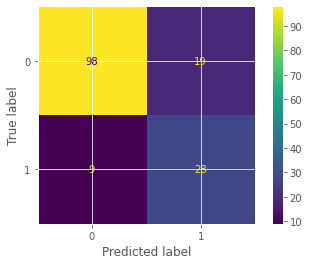

In [ ]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix(pred, y_test))
disp = disp.plot()